## <span style="color: yellow;"><b>Baseline on All data</b></span>

<span style="color: yellow;"><b>Imports</b></span>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier



<span style="color: yellow;"><b>Data from CSV</b></span>

In [ ]:
data = pd.read_csv('data/all_data.csv')

In [ ]:
len(data)

In [ ]:
data.columns

In [ ]:
data['toxic'] = (data['toxicity'] >= 0.5).astype(int)


<span style="color: yellow;"><b>Bag of Words + Logistic Regression</b></span>

In [18]:
# using comment_text and toxic

X = data['comment_text'].fillna('') 
y = data['toxic']

# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# convert to BoW

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [21]:
# logistic regression
log_reg_bow = LogisticRegression(random_state=42,max_iter=1000) 
log_reg_bow.fit(X_train_bow, y_train)

# prediction

y_pred_bow = log_reg_bow.predict(X_test_bow)


/Users/purviparmar/Documents/lexiguards/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
accuracy = accuracy_score(y_test, y_pred_bow)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_bow))

Accuracy: 0.9442
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    367632
           1       0.73      0.48      0.58     32272

    accuracy                           0.94    399904
   macro avg       0.85      0.73      0.78    399904
weighted avg       0.94      0.94      0.94    399904



### BoW and logistic regression summary:

<span style="color: grey;">

Accuracy: 94.42% - Overall correct prediction rate of 94.42%.

Among the identified non-toxic comments, 96% were correct.

Identified 98% of the actual non-toxic comments.

Balanced measure considering precision and recall for non-toxic comments 97%.

Among the identified toxic comments, 73% were correct.

Identified only 48% of the actual toxic comments.

Balanced measure considering precision and recall for toxic comments, resulting in 58%.

</span>

<span style="color: yellow;"><b>Confusion Matrix</b></span>

Confusion matrix: [[362010   5622]
 [ 16705  15567]]


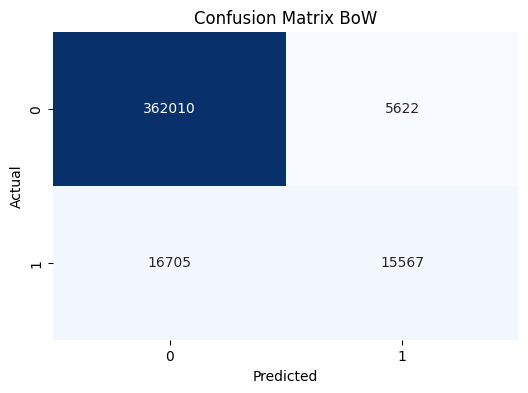

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: {conf_matrix}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BoW')
plt.show()

### Confusion Matrix Explaination:

<span style="color: grey;">

TP: 15,567. toxic comments.

TN: 362,010. non-toxic comments. The model is good at identifying non-toxic comments i.e. 362,010.

FP: 5,622. predicted as toxic, but actually non-toxic.

FN: 16,705. predicted as non-toxic, but actually toxic.

</span>

<span style="color: yellow;"><b>TF-IGF + Logistic Regression</b></span>

In [28]:
# using comment_text and toxic

X1 = data['comment_text'].fillna('') 
y1 = data['toxic']

# split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [29]:
# conver to TF-IGF

tfidf_vectorizer = TfidfVectorizer()
X1_train_tfidf = tfidf_vectorizer.fit_transform(X1_train)
X1_test_tfidf = tfidf_vectorizer.transform(X1_test)

In [30]:
# logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X1_train_tfidf, y1_train)

# prediction
y1_pred = log_reg.predict(X1_test_tfidf)

/Users/purviparmar/Documents/lexiguards/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy TF-IGF: {accuracy1:.4f}")
print(classification_report(y1_test, y1_pred))

Accuracy TF-IGF: 0.9472
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    367632
           1       0.79      0.47      0.59     32272

    accuracy                           0.95    399904
   macro avg       0.87      0.73      0.78    399904
weighted avg       0.94      0.95      0.94    399904



### TF-IGF and logistic regression summary:

<span style="color: grey;">

Accuracy: 94.42% - Overall correct prediction rate of 94.72%.

Among the identified non-toxic comments, 95% were correct.

Identified 99% of the actual non-toxic comments.

Balanced measure considering precision and recall for non-toxic comments 97%.

Among the identified toxic comments, 79% were correct.

Identified only 47% of the actual toxic comments.

Balanced measure considering precision and recall for toxic comments, resulting in 59%.

</span>

<span style="color: yellow;"><b>Confusion Matrix</b></span>

Confusion matrix: [[363744   3888]
 [ 17243  15029]]


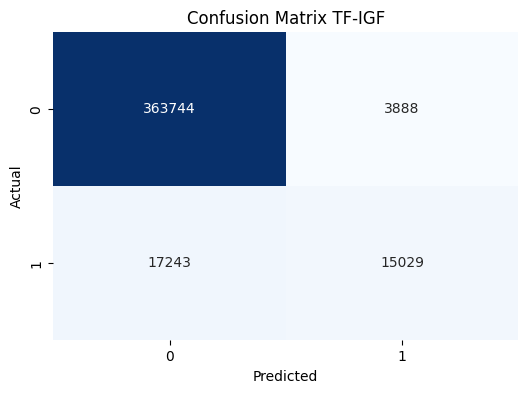

In [49]:
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print(f'Confusion matrix: {conf_matrix1}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TF-IGF')
plt.show()

### Confusion Matrix Explaination:

<span style="color: grey;">

TP: 15,029. toxic comments.

TN: 363,744,010. non-toxic comments. The model is good at identifying non-toxic comments i.e. 362,010.

FP: 3,888. predicted as toxic, but actually non-toxic.

FN: 17,243. predicted as non-toxic, but actually toxic.


### <span style="color: yellow;"><b>Dummy Classifier</b></span>

In [42]:
X2 = data['comment_text'].fillna('') 
y2 = data['toxic']

# split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [43]:
# dummy classifier
dummy_clf = DummyClassifier(strategy="stratified")  # You can change strategy if needed
dummy_clf.fit(X2_train, y2_train)

DummyClassifier(strategy='stratified')

In [44]:
y2_pred = dummy_clf.predict(X2_test)

In [53]:
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy Dummy Classifier: {accuracy1:.4f}")
print(classification_report(y2_test, y2_pred))

Accuracy Dummy Classifier: 0.9472
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    367632
           1       0.08      0.08      0.08     32272

    accuracy                           0.85    399904
   macro avg       0.50      0.50      0.50    399904
weighted avg       0.85      0.85      0.85    399904



<span style="color: yellow;"><b>Confusion Matrix: Dummy Classifier</b></span>

Confusion matrix: [[338291  29341]
 [ 29734   2538]]


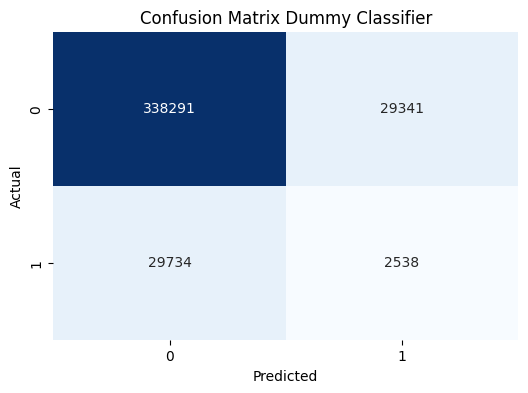

In [47]:
conf_matrix_dcl = confusion_matrix(y2_test, y2_pred)
print(f'Confusion matrix: {conf_matrix_dcl}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dcl, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Dummy Classifier')
plt.show()

### Confusion Matrix Explaination:

<span style="color: grey;">

TP: 2,538. toxic comments.

TN: 338,291. non-toxic comments. The model is good at identifying non-toxic comments i.e. 362,010.

FP: 29,341. predicted as toxic, but actually non-toxic.

FN: 29,734. predicted as non-toxic, but actually toxic.
